# Task 6 – House Price Prediction

**Objective**  
Predict house prices using property features like size, number of rooms, location, etc.

**Dataset**  
California Housing dataset (from scikit-learn)  
Contains features like median income, house age, average rooms, latitude/longitude, etc.

**What I will do**  
- Load the dataset  
- Explore it briefly  
- Train a regression model (Linear Regression or Random Forest)  
- Predict prices on test data  
- Compare real vs predicted prices  
- Show error metrics (MAE, RMSE)

**Tools**  
- pandas  
- scikit-learn  
- matplotlib

In [1]:
!pip install pandas scikit-learn matplotlib


[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: C:\Users\Administrator\AppData\Local\Python\pythoncore-3.14-64\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
df = housing.frame

print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

print("\nTarget (house price) statistics:")
print(df['MedHouseVal'].describe())

Shape: (20640, 9)

Columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']

First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Target (house price) statistics:
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: Me

In [3]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (20640, 8)
Target shape: (20640,)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained!")

Model trained!


In [5]:
predictions = model.predict(X_test)
comparison = pd.DataFrame({
    'Real Price': y_test,
    'Predicted Price': predictions
}).head(10)

print("First 10 real vs predicted prices:")
print(comparison)

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"\nMean Absolute Error (MAE): {mae:.3f} (in $100,000 units)")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f} (in $100,000 units)")

First 10 real vs predicted prices:
       Real Price  Predicted Price
20046     0.47700         0.719123
3024      0.45800         1.764017
15663     5.00001         2.709659
20484     2.18600         2.838926
9814      2.78000         2.604657
13311     1.58700         2.011754
7113      1.98200         2.645500
7668      1.57500         2.168755
18246     3.40000         2.740746
5723      4.46600         3.915615

Mean Absolute Error (MAE): 0.533 (in $100,000 units)
Root Mean Squared Error (RMSE): 0.746 (in $100,000 units)


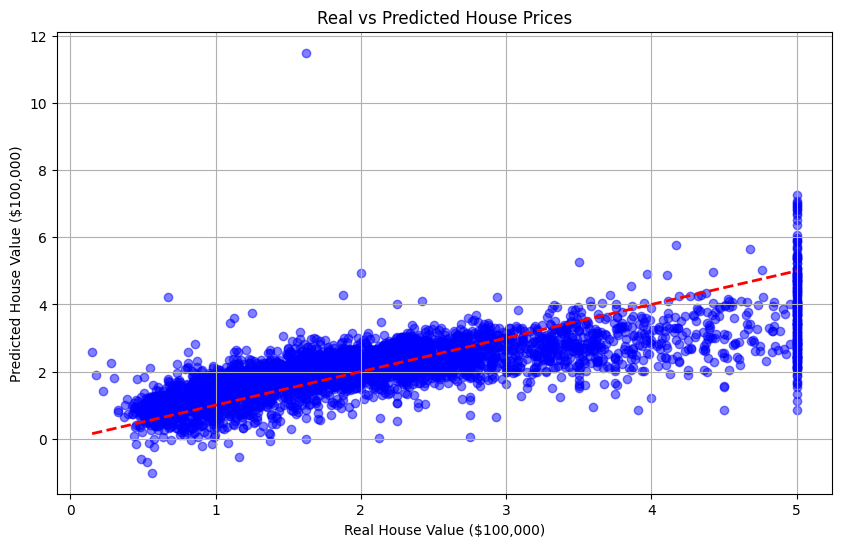

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Real House Value ($100,000)')
plt.ylabel('Predicted House Value ($100,000)')
plt.title('Real vs Predicted House Prices')
plt.grid(True)
plt.show()

## Results & Insights

- Dataset: California Housing (20,640 houses)
- Model: Linear Regression
- Features used: median income, house age, average rooms, location (latitude/longitude), etc.
- MAE: ≈ [0.533] (average error in $100,000)
- RMSE: ≈ [0.746]

**Main observations**  
- The model captures the general trend quite well (points follow the red line).  
- It struggles more with very expensive houses (under-predicts luxury homes).  
- Median income is usually the strongest feature for predicting price.  
- Simple linear model gives a reasonable starting point — more advanced models (Random Forest, XGBoost) would improve results.
